In [1]:
from sklearn import datasets as ds
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Generatign Training data for classification

In [2]:
X,y = ds.make_classification(n_samples=1000, n_features=2, n_classes=3, n_redundant=0, n_clusters_per_class=1, random_state=41)

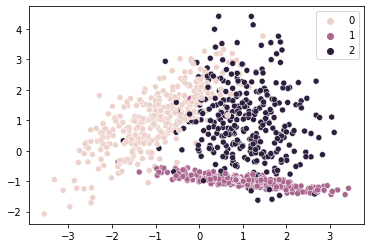

In [3]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
plt.show()

## KNN class

- init with K value
- fit method to register training data
- predict methos to calcualte Euclidean distance and get the mjority voting in matrix form

In [103]:
class KNN:
    def __init__(self, k=5):
        self.k = k
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train        
        
    def predict(self,X_new):
        ##one slice per one new instance
        X_new = np.reshape(X_new,(X_new.shape[0],1,X_new.shape[1]))
        squared_diffs = np.square(self.X_train - X_new)
        sum_squared_diffs = np.sum(squared_diffs, axis=2)
        root_sum_squared_diffs = np.sqrt(sum_squared_diffs)        
        arg_sorted = np.argsort(root_sum_squared_diffs, axis=1)
        k_arg_sorted = arg_sorted[:,:self.k]        
        preds, probas = self.getPreds(self.y_train[k_arg_sorted])
        
        return np.array(preds), np.array(probas)
        
    def getPreds(self, k_neighbours):
        final_labels = []
        pred_probas = []
        for row in k_neighbours.tolist():
            freq_dict = {}
            for val in row:
                if val not in freq_dict:freq_dict[val]=0
                freq_dict[val] += 1
                
            max_count = 0
            final_label = None
            final_label_proba = 0
            
            for label, count in freq_dict.items():
                if count > max_count:
                    max_count = count
                    final_label = label
                    final_label_proba = count/sum(freq_dict.values())
                    
            final_labels.append(final_label)
            pred_probas.append(final_label_proba)
            
        return final_labels, pred_probas
            
            
        
        
        

## Testing

#### Get new data

In [68]:
X_new,y_new = ds.make_classification(n_samples=10, n_features=2, n_classes=3, n_redundant=0, n_clusters_per_class=1, random_state=41)

#### USe the KNN class and methods

In [104]:
knn = KNN(k=5)
knn.fit(X,y)
preds, probas = knn.predict(X_new)

In [109]:
#prediciton and probabilities
preds, probas

(array([2, 1, 0, 2, 2, 0, 2, 1, 1, 0]),
 array([1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.6, 1. ]))

In [110]:
# actual labels
y_new

array([2, 2, 1, 0, 0, 1, 2, 0, 0, 1])